In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


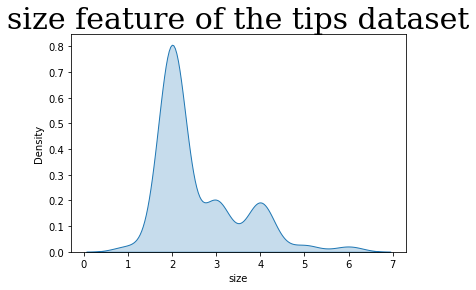

In [ ]:
# KDE plot for the size feature of the tips dataset.
df1=sns.kdeplot(tips['size'], shade= True)
font = {'family':'serif','color':'black','size':30}
df1.set_title('size feature of the tips dataset', fontdict = font)
plt.show()

From the plot above, the size colume is skewed to the rate and it has more than one node, the highest node at size 2, this implies the size 2 is the most frequent size in the tips data

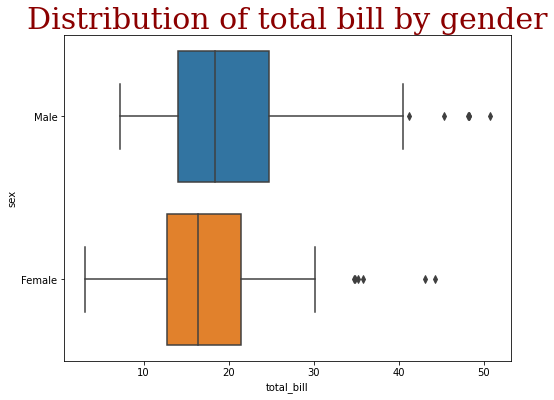

In [ ]:
# the distribution of total bill by gender for the tips dataset.
plt.figure(figsize=(8,6))
df2=sns.boxplot(data=tips, x='total_bill', y='sex')
font = {'family':'serif','color':'darkred','size':30}
df2.set_title('Distribution of total bill by gender', fontdict = font)
plt.show()

The plot above shows the distribution of bills by gender. 
The blue box plot representing the male gender shows the presence of outliers from bill 42 to 50, the median being 20, 1st and 3rd quartiles being 10 and 40 respectively. The interquartile range ranging from 15 to 25. 

The yellow box plot representing the female gender shows the presence of outliers from bill 35 to 45, the median being 16.5, 1st and 3rd quartiles being 2 and 30 respectively. The interquartile range ranging from 12 to 22. 

The highest bill was paid by the male gender.

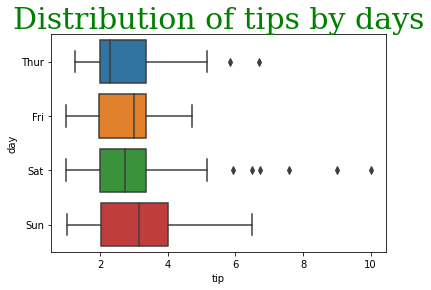

In [ ]:
# distribution of tips by days.
df=sns.boxplot(data=tips, x='tip', y='day')
font = {'family':'serif','color':'green','size':30}
df.set_title('Distribution of tips by days', fontdict = font)
plt.show()

The plot above shows the distribution of tips by by days from sunday to thursday.
There are no outliers on friday and Sunday and the highest tip was given on Sunday. 

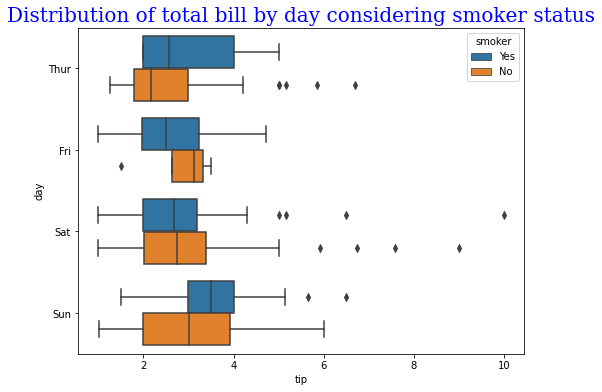

In [ ]:
# the distribution of tips by days considering smoker status of the customer
plt.figure(figsize=(8,6))
df5=sns.boxplot(data=tips, x='tip', y='day', hue ='smoker')
font = {'family':'serif','color':'blue','size':20}
df5.set_title('Distribution of total bill by day considering smoker status', fontdict = font)
plt.show()

The plot above shows the distribution of total bill by days considering smoker status of the customer. 
On Sunday, Non smokers paid gave the highest tips.
On saturday, non smokers equally gave the highest tips.
However, on Friday smokers gave the highest tips ( probably because it was a weekend)
on THursday, the highest tip was given by smokers. 

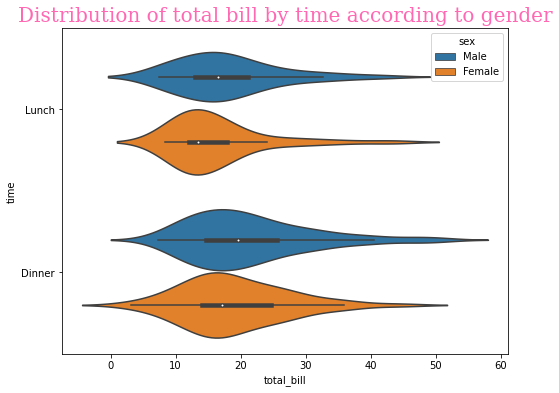

In [ ]:
# The distribution of total bill by time given the genders.
plt.figure(figsize=(8,6))
df4 =sns.violinplot(data=tips, x=tips['total_bill'], y=tips['time'], hue='sex', orient='horizontal')
font = {'family':'serif','color':'hotpink','size':20}
df4.set_title('Distribution of total bill by time according to gender', fontdict = font)
plt.show()


The plot above shows the distribution of total bill by time given the genders. 

At lunch time, men paid more bills than women, equally at dinner time men paid more bills than women.

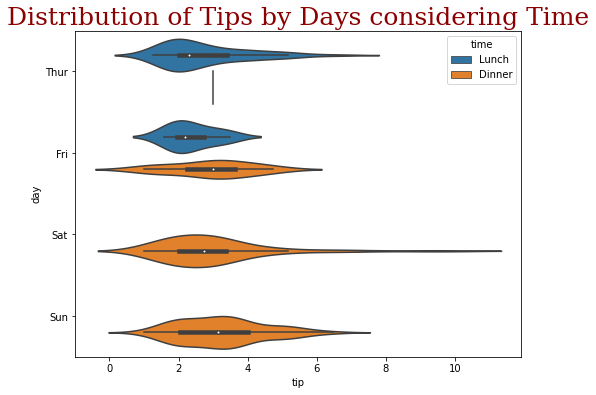

In [ ]:
# The distribution of tips by days also considering time
plt.figure(figsize=(8,6))
df3= sns.violinplot(data=tips, x=tips['tip'], y=tips['day'], hue='time', orient='horizontal')
font = {'family':'serif','color':'darkred','size':25}
df3.set_title('Distribution of Tips by Days considering Time', fontdict = font)
plt.show()


The plot above shows the distribution of tips by days also considering time the tips was given.

On sunday, tip was only given during dinner time, nothing was received at lunch time. 
On saturday, tip was only given during dinner time, nothing was received at lunch time.
On FRiday tips was received both at dinner and lunch time
On thursday, tip was only given during lunch time, nothing was received at dinner time.

The highest number of tips was received on saturday during dinner time

In [ ]:
corr = tips.corr()
corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


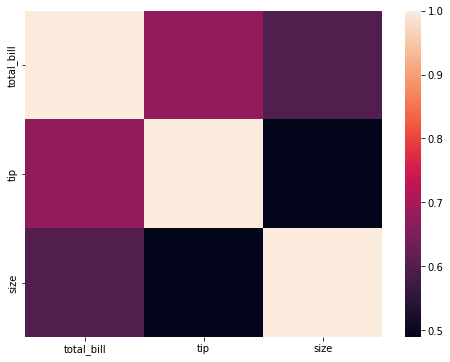

In [ ]:
#Generating heatmap of correlations
plt.figure(figsize=(8,6))
sns.heatmap(corr)
plt.show()

From the plot above, tip and total bill have a good possitive correlation, while tip and size has a weak possitive correlation, size and total bill have a good possitive correlation.

In [ ]:
# using numpy functions to mask data to create a matrix of booleans
ones= np.ones_like(corr, dtype='bool')

# using numpy functions to get just the upper triangle of the boolean array
mask = np.triu(ones)
masks= mask[1:, :-1]

corr = corr.iloc[1:,:-1].copy()

<function matplotlib.pyplot.show(*args, **kw)>

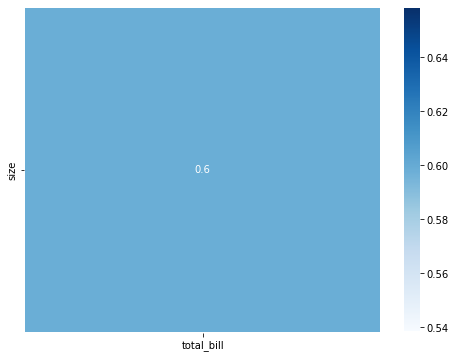

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr, mask = masks, annot=True, fmt='.1f', cmap='Blues', linewidths=.8, cbar_kws={'shrink':.99})
ax.xaxis.tick_bottom()
plt.show